# 计算机图形学

本科课程 (刘晓翔授课) 以及个人的一些实验.

## 工具

首先需要定义相关工具函数 (utility) 完成光栅化等工作.

### 画点

函数 `draw` 用于上下文管理.  函数 `dot` 即在笛卡尔坐标系的二维坐标中画点, 颜色默认黑色.

In [1]:
%matplotlib notebook

from contextlib import contextmanager
import matplotlib.pyplot as plt


@contextmanager
def draw():
    yield
    plt.show()


def dot(x, y):
    plt.scatter(x, y)

例如, 画一个坐标为 $(4, 2)$ 的点 $P_0$

<IPython.core.display.Javascript object>


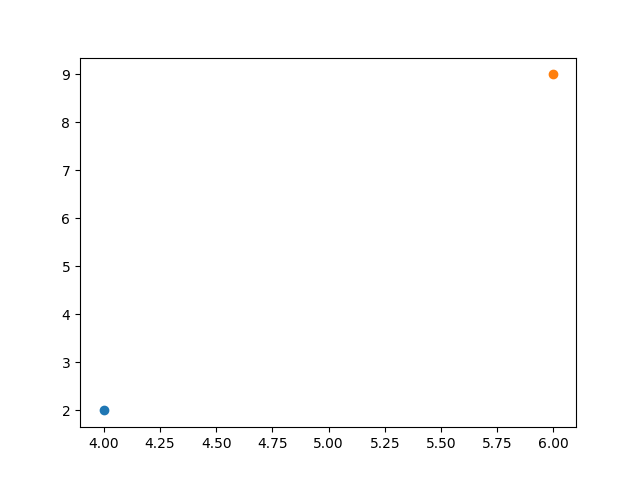

In [2]:
with draw():
    dot(4, 2)
    dot(6, 9)

## 基本图形的扫描转换算法

基本图形囊括

* 直线
* 圆
* 椭圆
    
### 直线

#### 基本思想

已知过端点 $P_0(x_0, y_0)$, $P_1(x_1, y_1)$ 的直线段 $L$
$$y = kx + b$$
直线斜率为 $$k = \frac{y_1 - y_0}{x_1 - x_0}$$
令 $x = x_0 \rightarrow x_!$, $x = x + \Delta x$
$$y = kx + b$$
$$\therefore (x, round(y))$$
其中 $round$ 指 *round half up*, 即 *四舍五入*.
这种算法效率低, 因为每一步需要一次浮点乘法和一次舍入运算.

#### 画直线的三种算法

* DDA (digital differential analyzer)
* 中点画线算法 (midpoint line algorithm)
* Bresenham 画线算法 (Bresenham's line algorithm)

In [ ]:
# TODO